# <font color = "#acb1d6" face="Garamond" > Advance Regression Assignment </font>


# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

 * Which variables are significant in predicting the price of a house, and

 * How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


# Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# EDA and Data Preparation

## Importing Necessary Libraries

In [90]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Dataframe libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [92]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

In [93]:
# Sk Learn and Required Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os
import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

## Data analysis

In [94]:
# Read dataset
house_df = pd.read_csv('data/train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
house_df.shape

(1460, 81)

In [96]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
## Checking for null values

house_df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
# Computing Null/Missing values for dataset
def check_missing_values(data) :
    col_list = list(house_df)
    null = []
    for value in house_df.isnull().sum()*100/data.shape[0]:
        null.append(value)
    data_dict = {'column': col_list, 'null_precent': null}
    data_null = pd.DataFrame(data_dict)

    data_null = data_null.sort_values(by='null_precent',ascending=False)    
    return data_null[data_null['null_precent'] != 0]

# Check % of missing data
check_missing_values(house_df)

,column,null_precent
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
25,MasVnrType,59.726027
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945


In [100]:
# Drop Columns Which has more null values
print('Shape of the orginal data:', house_df.shape)
# I am removing Id as it doesn't add any value in prediction
house_df = house_df.drop(['Id','MasVnrType', 'FireplaceQu'], axis = 1)
print('Shape after dropping:', house_df.shape)

Shape of the orginal data: (1460, 81)
Shape after dropping: (1460, 78)


In [101]:
# Fill NANs for Numerical Columns

# for no Garage 
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_df[col].fillna('No Garage', inplace=True)
house_df['GarageYrBlt'].fillna(0, inplace=True)

# for no Basement
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    house_df[col].fillna('No Basement', inplace=True)


check_missing_values(house_df)

,column,null_precent
69,PoolQC,99.520548
71,MiscFeature,96.301370
5,Alley,93.767123
70,Fence,80.753425
2,LotFrontage,17.739726
24,MasVnrArea,0.547945
40,Electrical,0.068493


In [102]:
house_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 78, dtype: int64

In [103]:
house_df.isnull().sum().columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# Column names are bit confusing,hence renaming them for better understanding


## Checking for duplicates

In [ ]:
# Checking for duplicate entries and dropping if any

house_df_dup = house_df

house_df_dup.drop_duplicates(subset = None, inplace = None)
house_df_dup.shape



(1460, 74)

* No duplicate values present

## Handling redundant columns

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

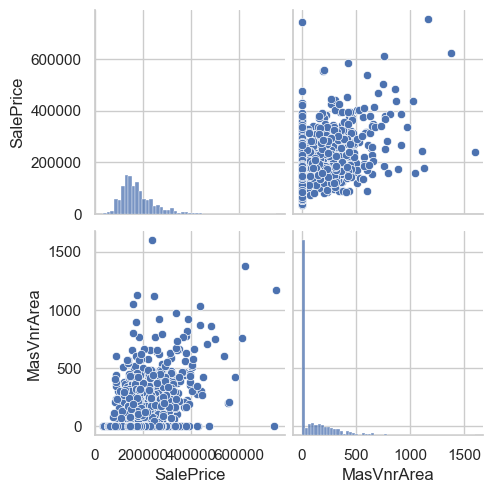

In [ ]:
# Checking Relationship b/w SalePrice & MasVnrArea
sns.pairplot(house_df[['SalePrice','MasVnrArea']])

# Checking Distribution for  MasVnrArea.
house_df['MasVnrArea'].describe([0.25,0.50,0.75,0.90,0.95,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

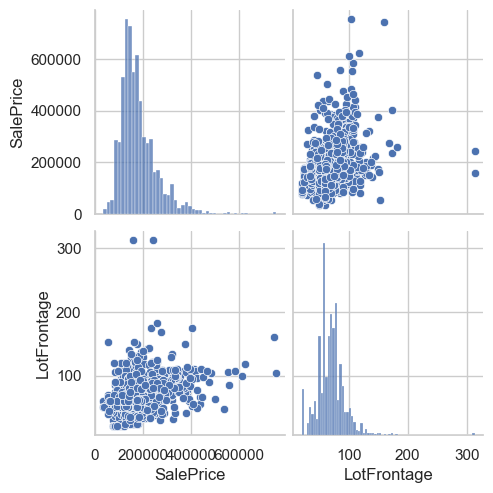

In [ ]:
# Since LotFrontage has 17% missing values, let's check it's relationship with SalesPrice.
sns.pairplot(house_df[['SalePrice','LotFrontage']])

house_df['LotFrontage'].describe([0.25,0.50,0.75,0.90,0.95,0.99])

In [ ]:
# As we can see LotFrontage & MasVnrArea  is skewed, we would hence impute it with Median
house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(),inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median(),inplace=True)

In [ ]:
# Check which Columns have repititive values. i.e. The same value occuring for X % of the datapoints

threshold = 0.98
drop_columns = []
for column in house_df.columns :
    unique_data = pd.DataFrame(house_df[column].value_counts()).reset_index()
    values = unique_data[column].tolist()
    
    for value in values :
        common_percent = value/house_df.shape[0]
        if int(value)/int(house_df.shape[0] > threshold) :
            print("Column : {} has {} % values same.".format(column,round(common_percent,3)))
            drop_columns.append(column)

# We will drop these columns
data = house_df.drop(drop_columns, axis = 1)
print("Data Size : {}".format(data.shape))            

Column : MSSubClass has 0.014 % values same.
Column : MSSubClass has 0.041 % values same.
Column : MSSubClass has 0.034 % values same.
Column : MSSubClass has 0.082 % values same.
Column : MSSubClass has 0.021 % values same.
Column : MSSubClass has 0.11 % values same.
Column : MSSubClass has 0.048 % values same.
Column : MSSubClass has 0.055 % values same.
Column : MSSubClass has 0.062 % values same.
Column : MSSubClass has 0.13 % values same.
Column : MSSubClass has 0.058 % values same.
Column : MSSubClass has 0.051 % values same.
Column : MSSubClass has 0.031 % values same.
Column : MSSubClass has 0.123 % values same.
Column : MSSubClass has 0.027 % values same.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# Check remaining Missing Data
check_missing_values(data)

,column,null_precent
39,Electrical,0.068493


In [ ]:
# As we just have 1 instance of missing value, we will drop this row/datapoint from our dataset
data.dropna(axis='rows', inplace=True)
check_missing_values(data)

,column,null_precent
39,Electrical,0.083752


# Data Visualization

## Converting into categorical columns 
<br>


In [ ]:
# Finally we would just like to have a look at our Categorical & Numerical features

column_info = pd.DataFrame(data.dtypes).reset_index()
num_col = column_info['index'][column_info[0] !='object'].tolist()
cat_col = column_info['index'][column_info[0] =='object'].tolist()

prediction_col = num_col[-1]
num_col=num_col[:-1]

print("Column to Predict  : {}".format(prediction_col))
print()
print("Numerical Columns : {}".format(num_col))
print()
print("Categorical Columns : {}".format(cat_col))

Column to Predict  : SalePrice

Numerical Columns : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical Columns : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'Ga

In [ ]:
# Eliminating Outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Compute
print("Data Size with Outliers : {}".format(data.shape))
z = np.abs(stats.zscore(data[num_col]))

# Outlier Removed Records
selected_data = data[num_col][(z < 3).all(axis=1)]

# indexing to keep selected data
data = data.loc[selected_data.index]

print("Data Size after removing Outliers : {}".format(data.shape))

Data Size with Outliers : (1194, 74)
Data Size after removing Outliers : (796, 74)


## Step 2 : Visualize Data (EDA)

In [112]:
# Univariate Analysis of Numerical column
def num_col_analysis(idx, x_col, y_col, data):
    plt.figure(idx + 1)
    sns.jointplot(x=x_col, y=y_col, data=data[[x_col, y_col]])

# Univariate Analysis of Categorical column
def cat_col_analysis(idx, x_col, y_col, data):
    plt.subplot(len(cat_col), 2, idx)
    
    if x_col not in data.columns or y_col not in data.columns:
        print(f"Error: {x_col} or {y_col} not found in the DataFrame.")
        return

    sns.boxplot(x=x_col, y=y_col, data=data)



<Figure size 3000x20000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

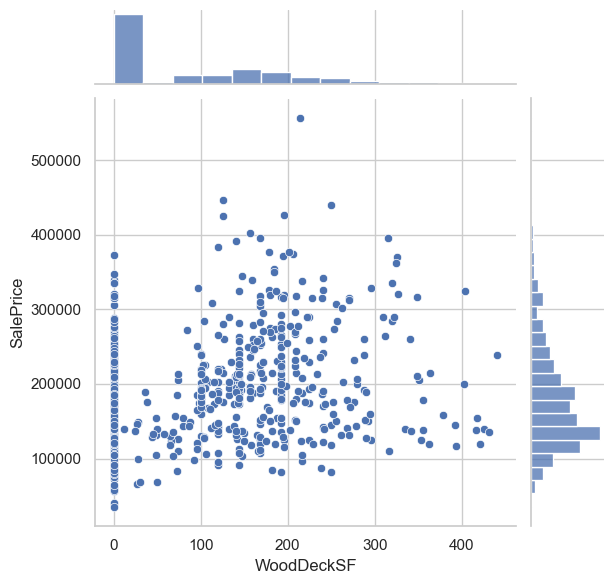

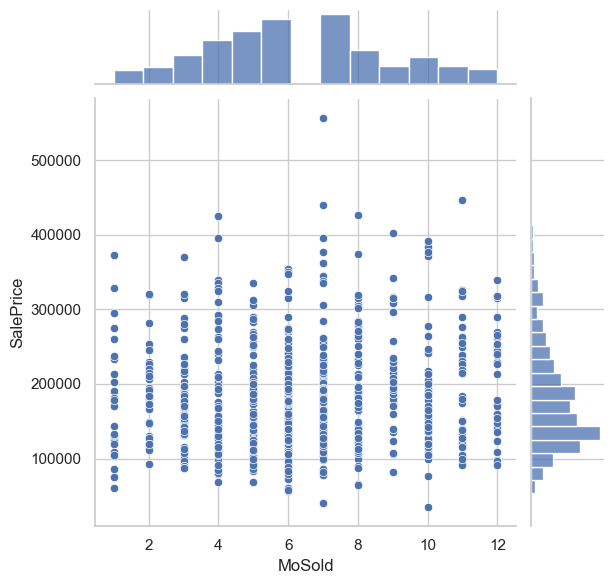

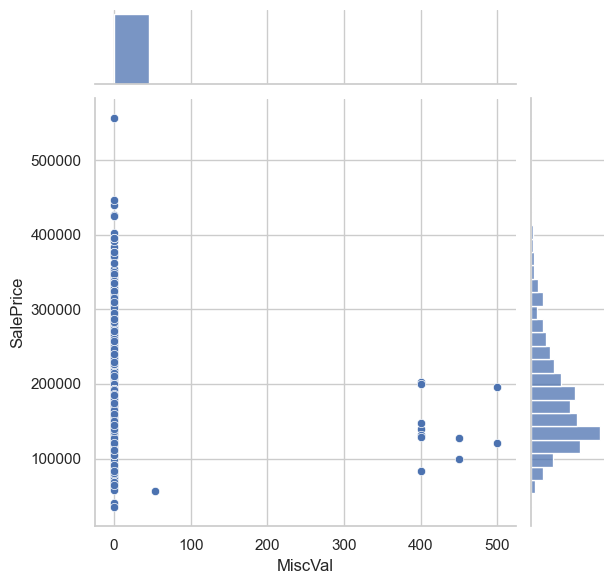

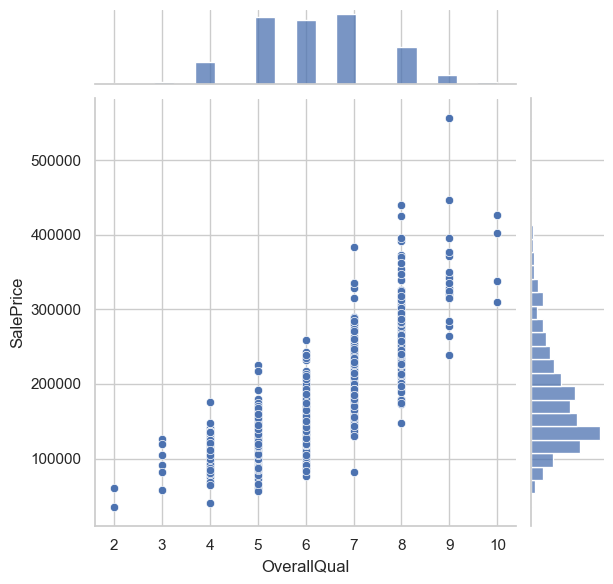

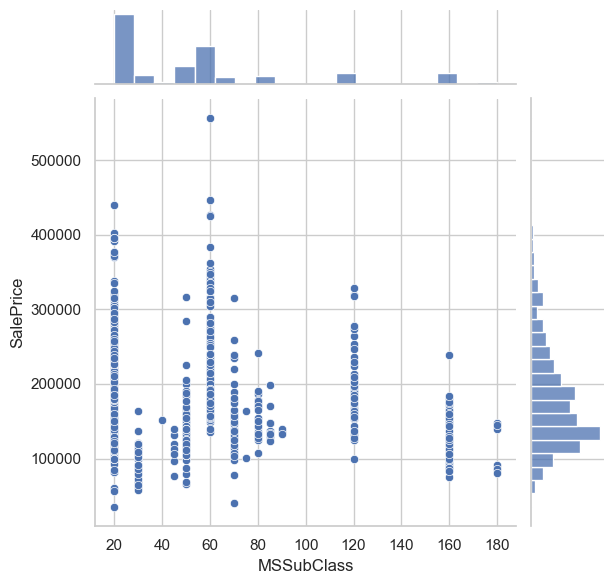

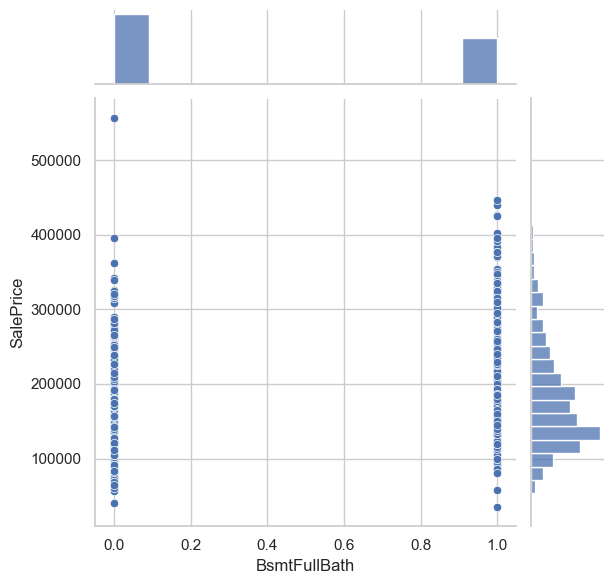

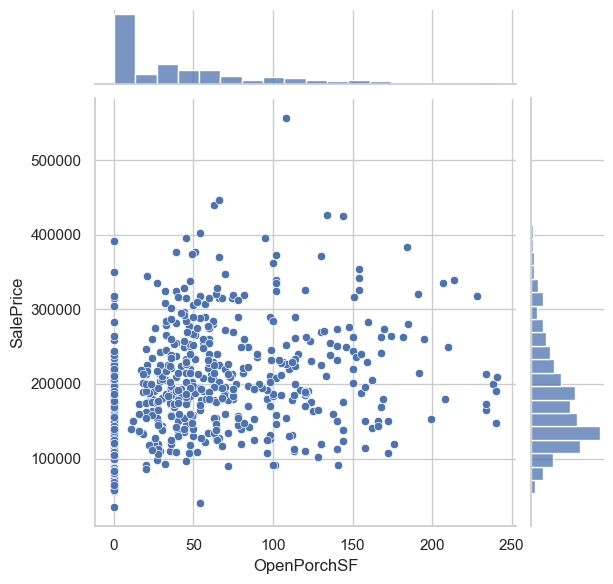

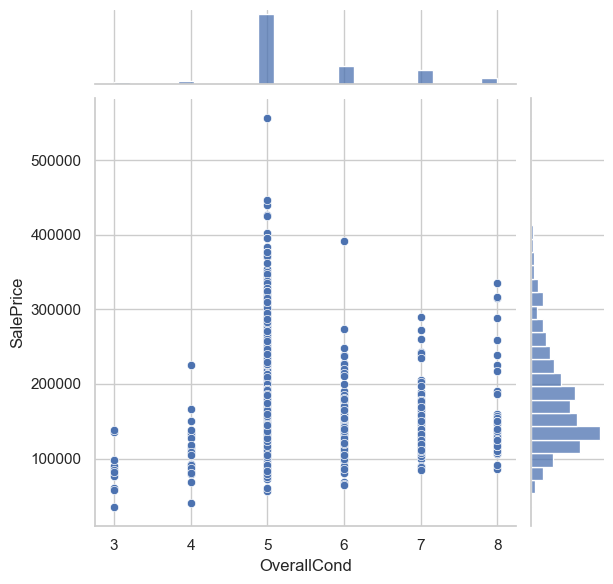

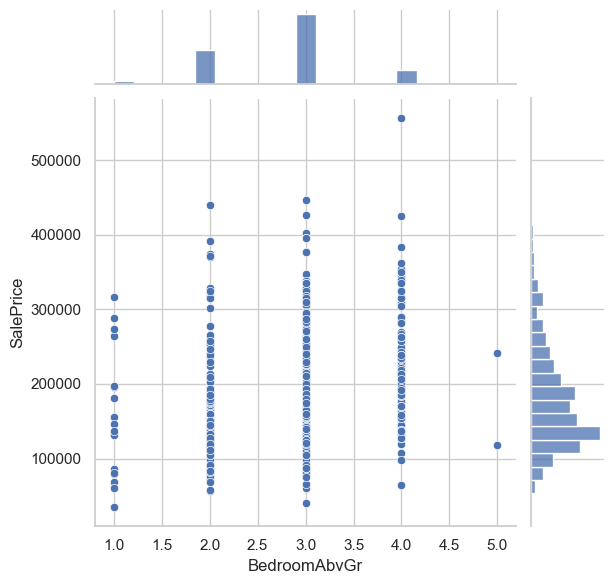

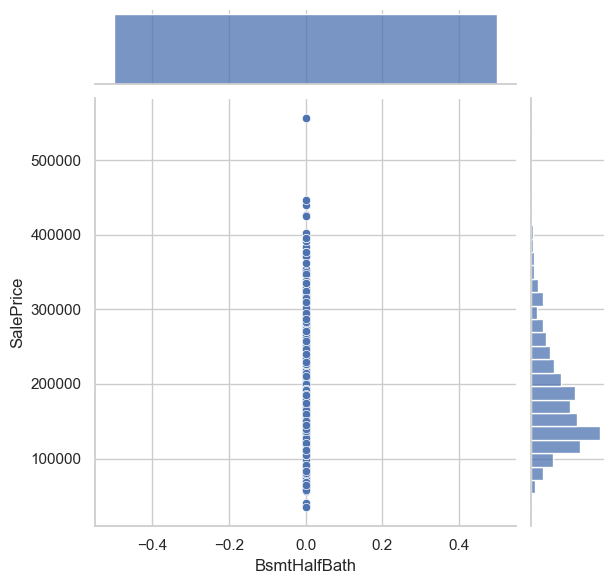

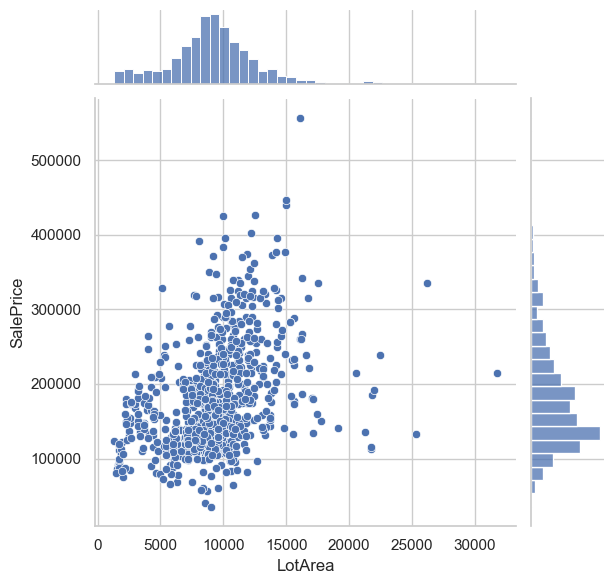

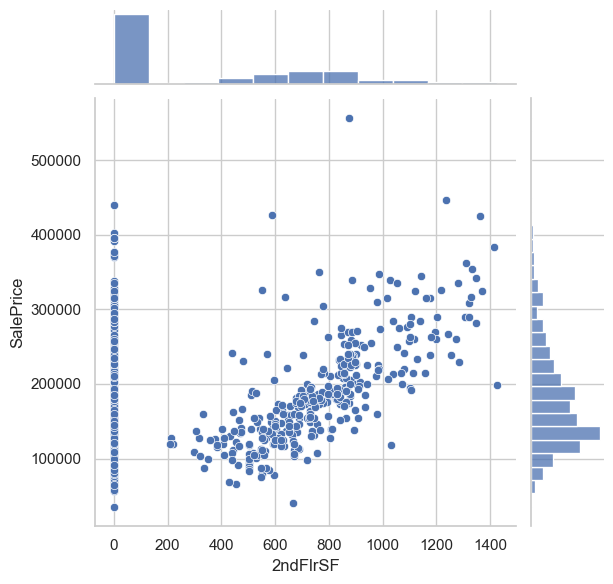

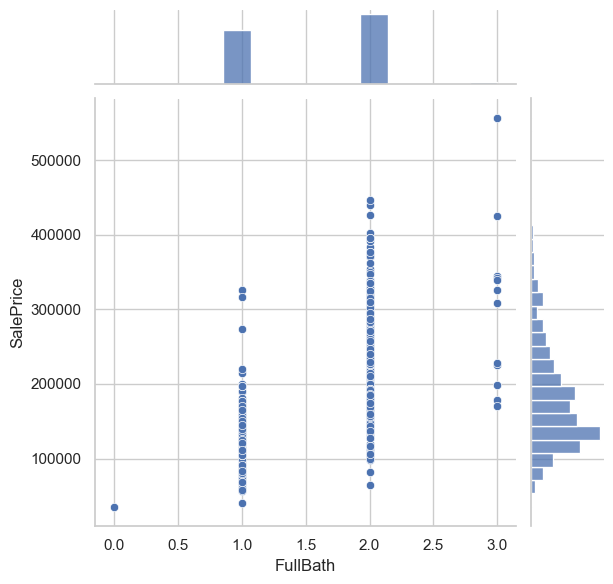

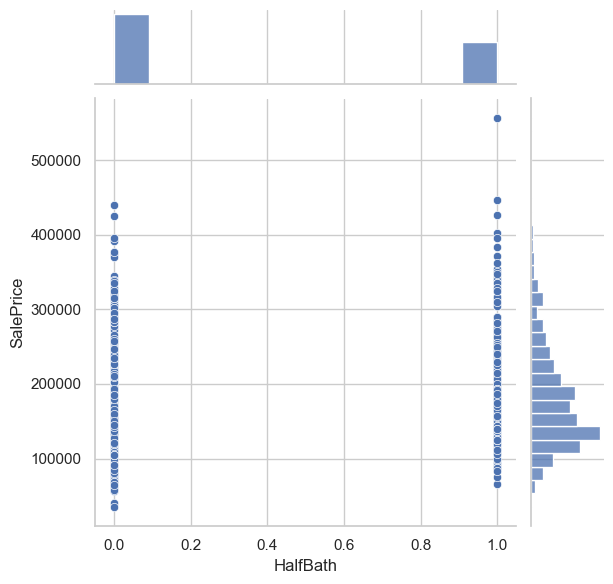

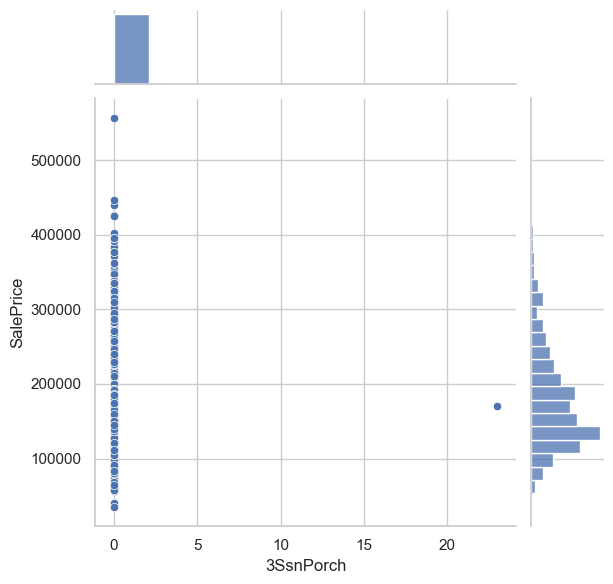

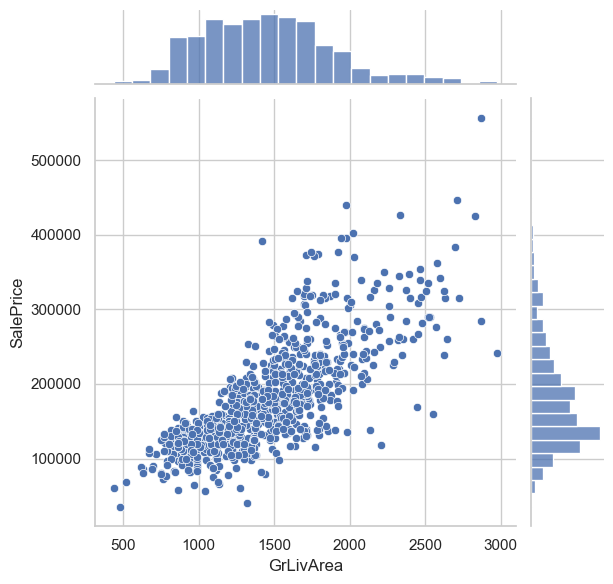

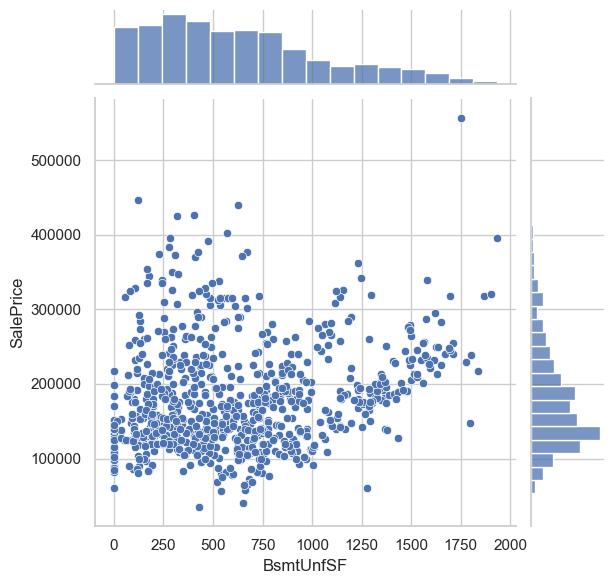

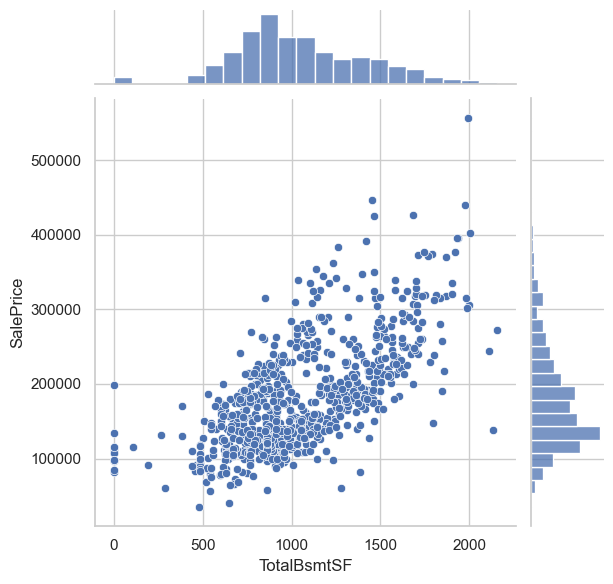

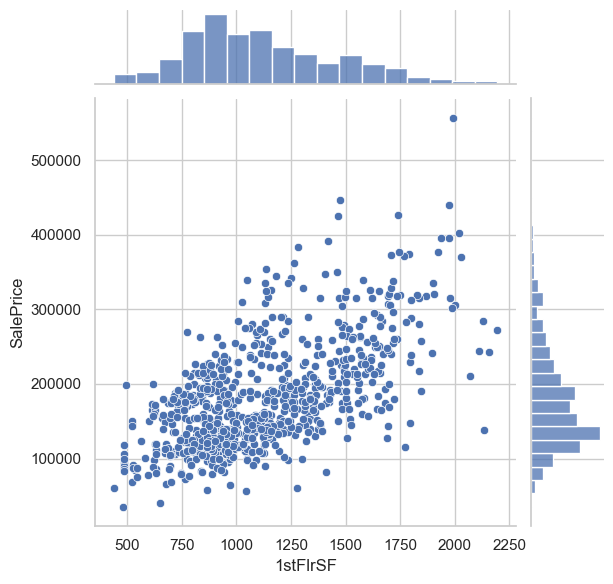

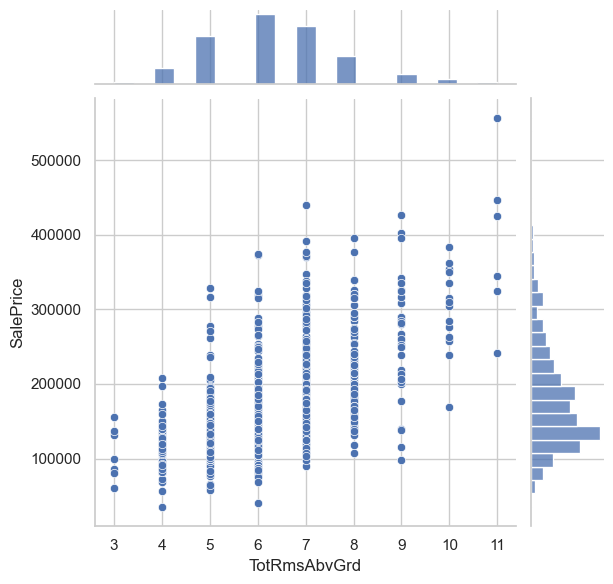

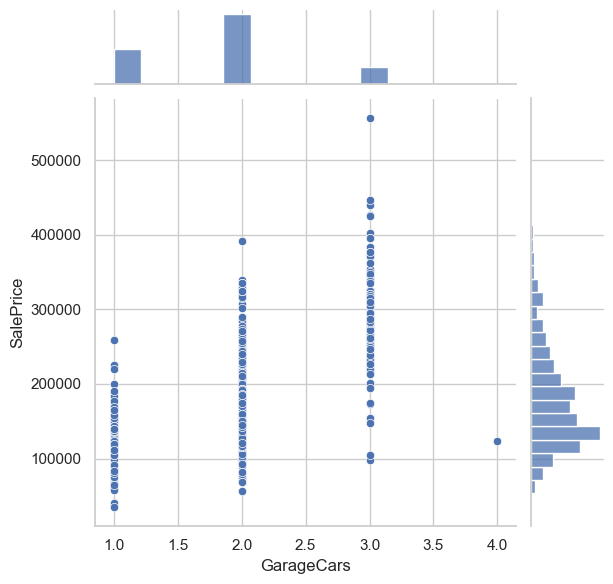

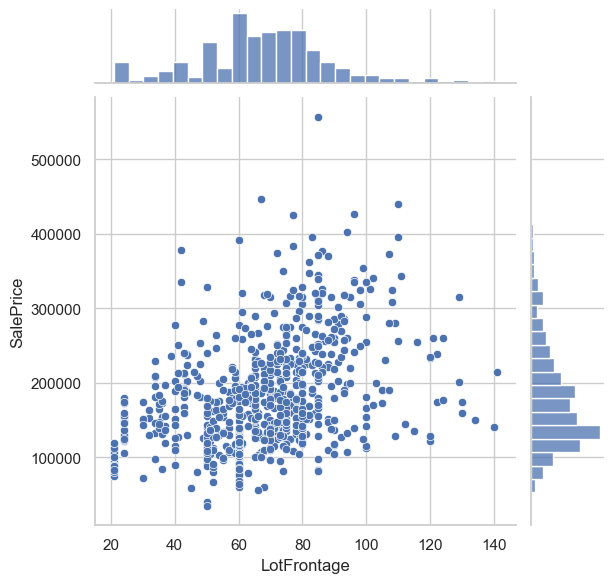

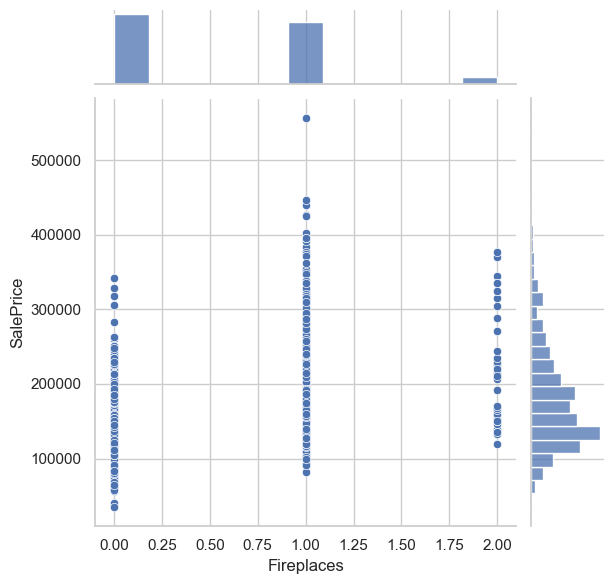

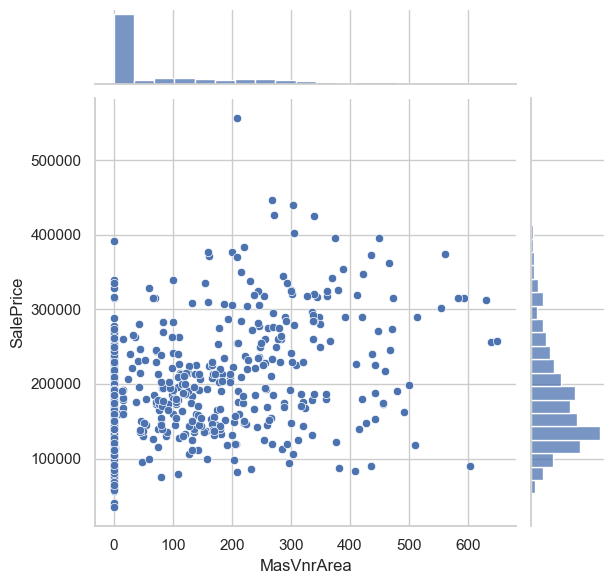

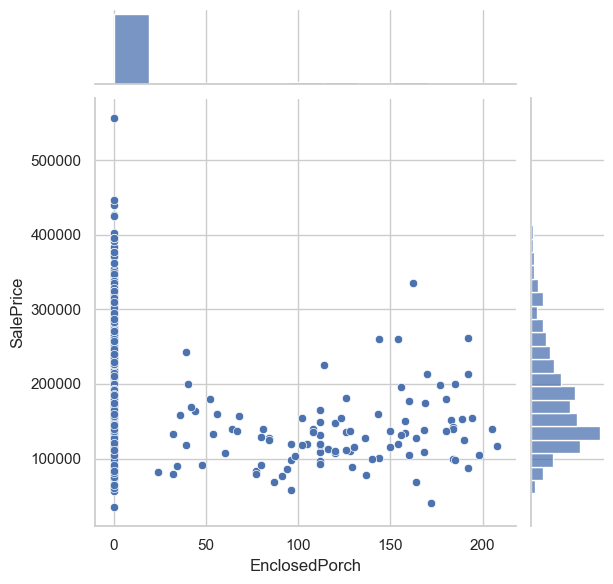

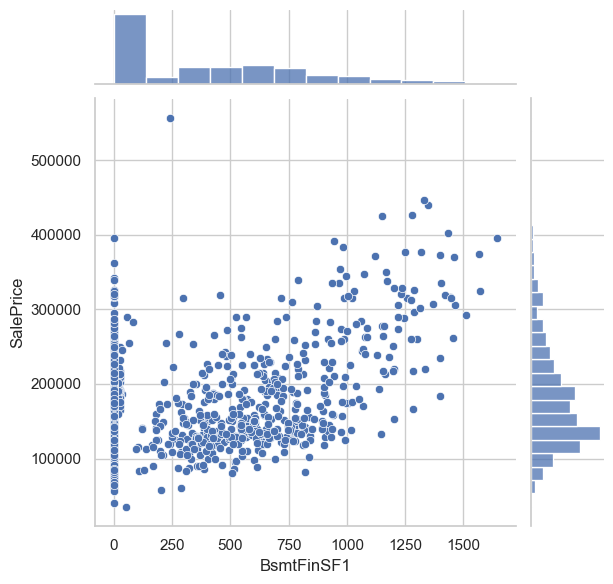

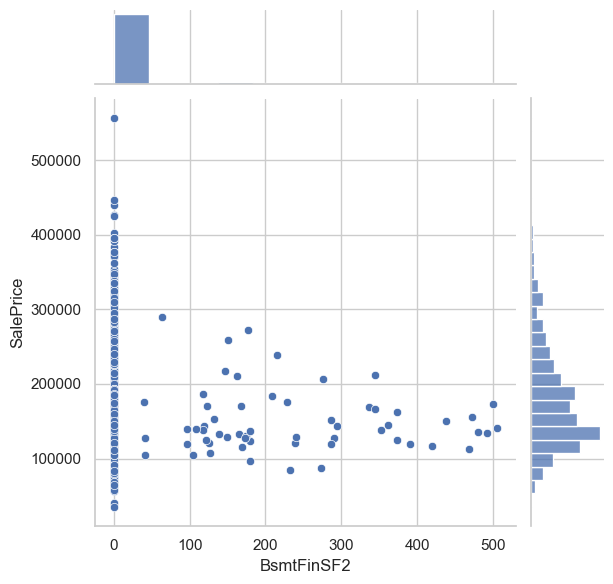

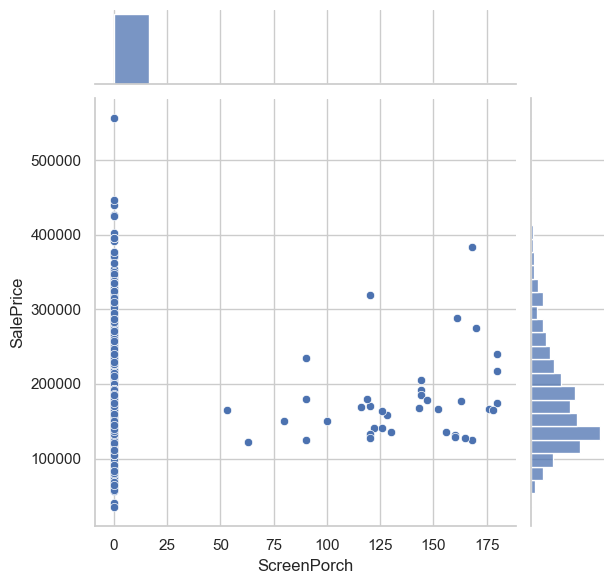

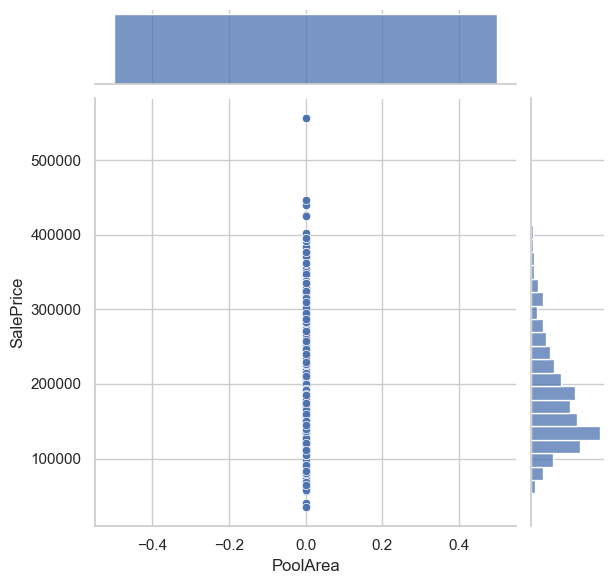

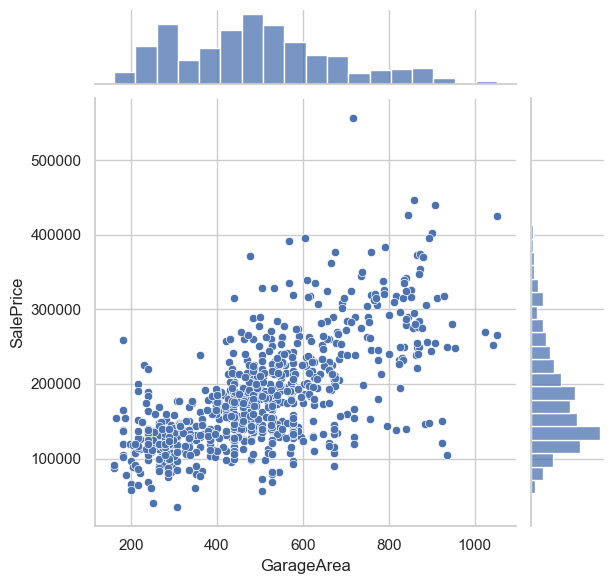

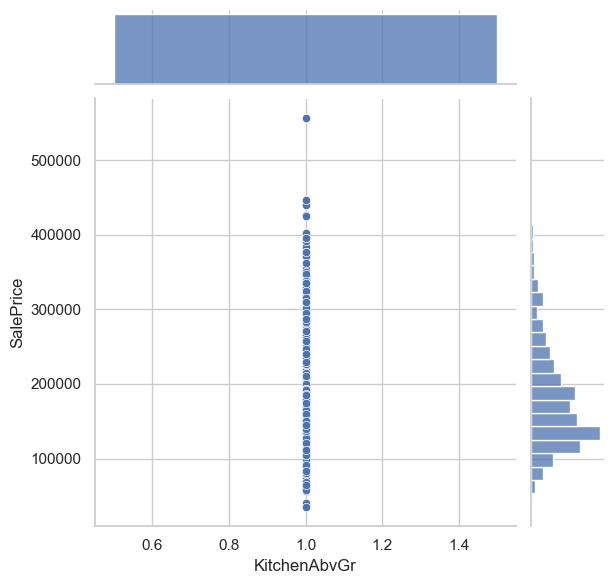

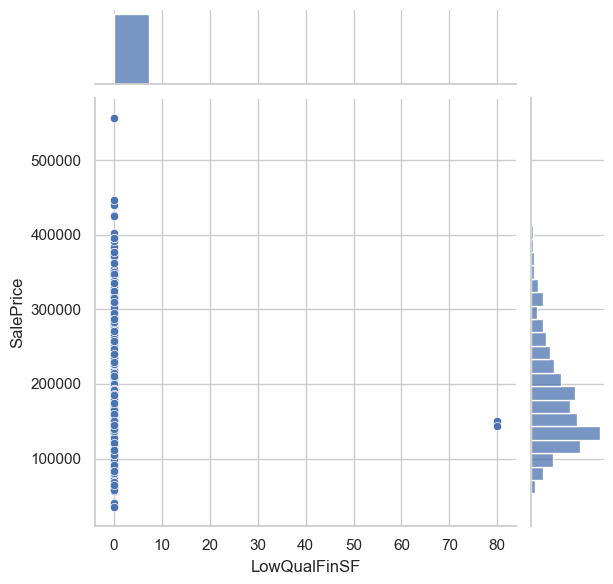

In [106]:
plt.figure(figsize=(30, 200))
for idx,col in enumerate(num_col) :
    num_col_analysis(idx+1,col,prediction_col,data)

Error: SaleType or SalePrice not found in the DataFrame.
Error: Street or SalePrice not found in the DataFrame.
Error: HouseStyle or SalePrice not found in the DataFrame.
Error: Exterior1st or SalePrice not found in the DataFrame.
Error: LandContour or SalePrice not found in the DataFrame.
Error: Exterior2nd or SalePrice not found in the DataFrame.
Error: LotConfig or SalePrice not found in the DataFrame.
Error: BsmtFinType2 or SalePrice not found in the DataFrame.
Error: Utilities or SalePrice not found in the DataFrame.
Error: PavedDrive or SalePrice not found in the DataFrame.
Error: GarageType or SalePrice not found in the DataFrame.
Error: Heating or SalePrice not found in the DataFrame.
Error: Condition2 or SalePrice not found in the DataFrame.
Error: Functional or SalePrice not found in the DataFrame.
Error: MSZoning or SalePrice not found in the DataFrame.
Error: BldgType or SalePrice not found in the DataFrame.
Error: Condition1 or SalePrice not found in the DataFrame.
Error: 

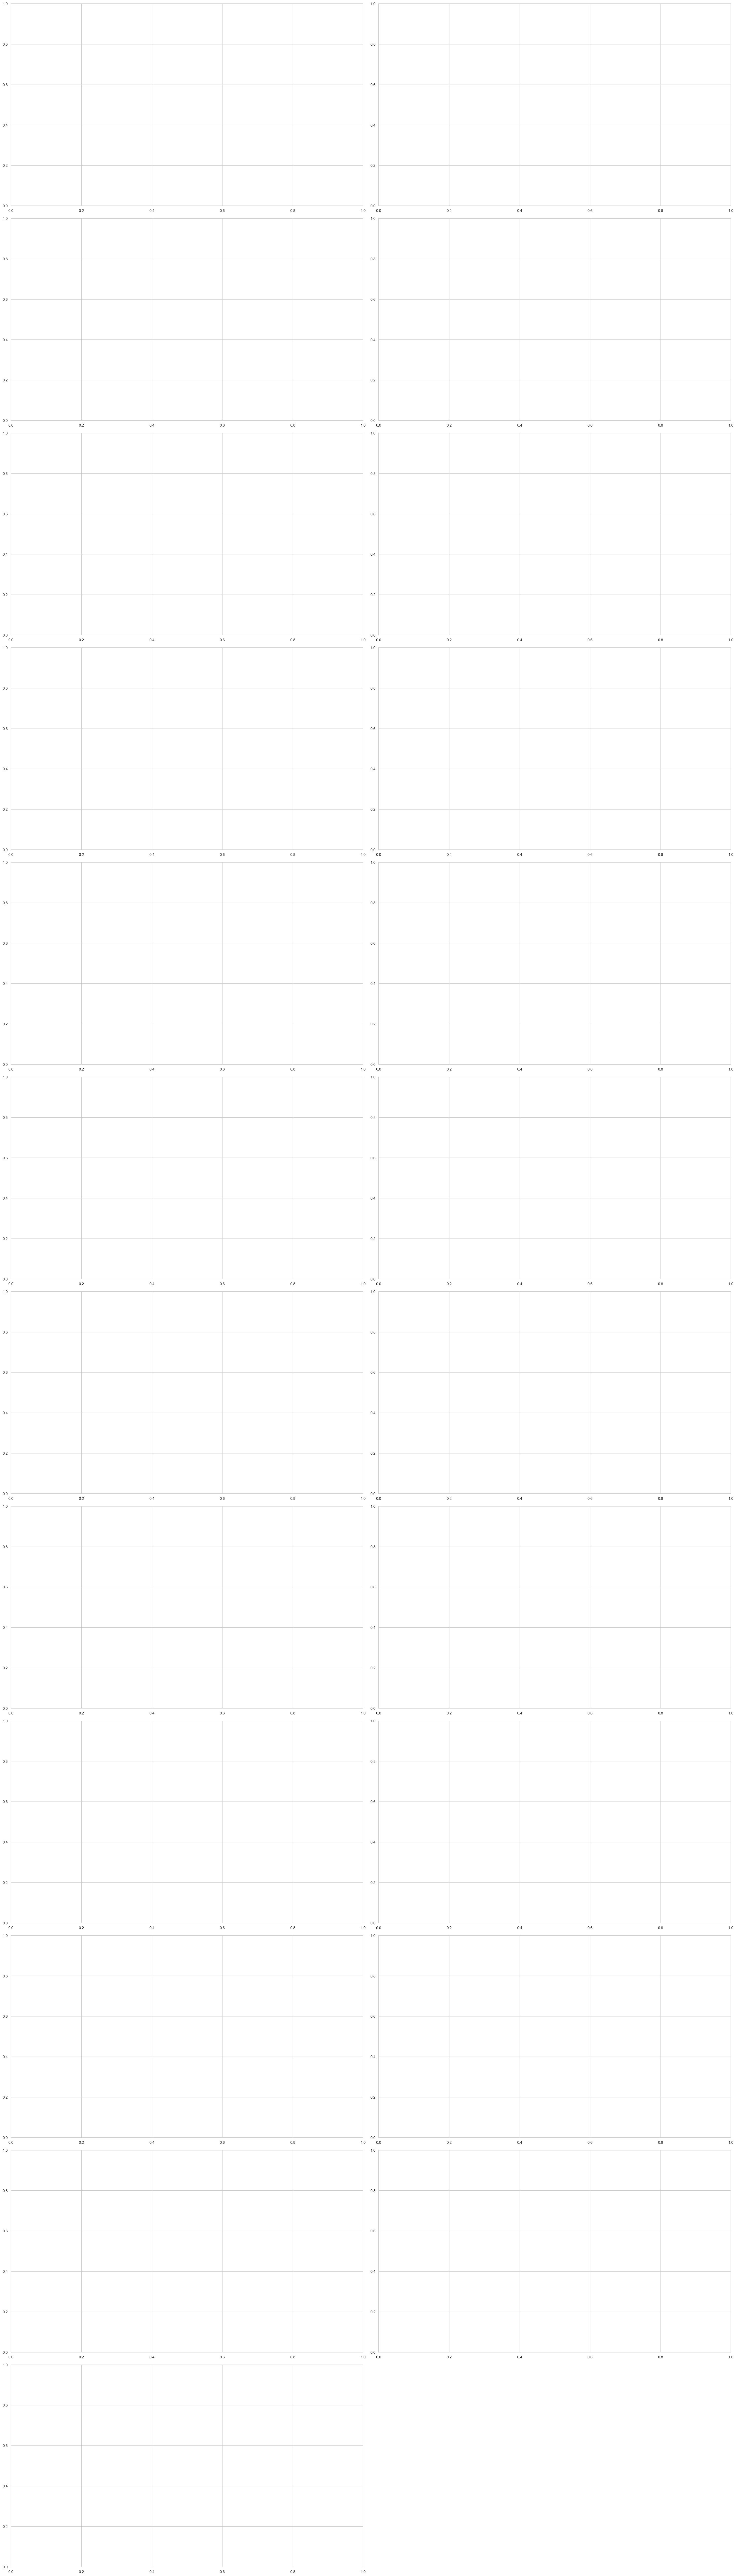

In [113]:
plt.figure(figsize=(30, 200))

for idx, col in enumerate(cat_col):
    plt.subplot(len(cat_col), 2, idx + 1)
    cat_col_analysis(idx + 1, col, prediction_col, data)

plt.tight_layout()
plt.show()


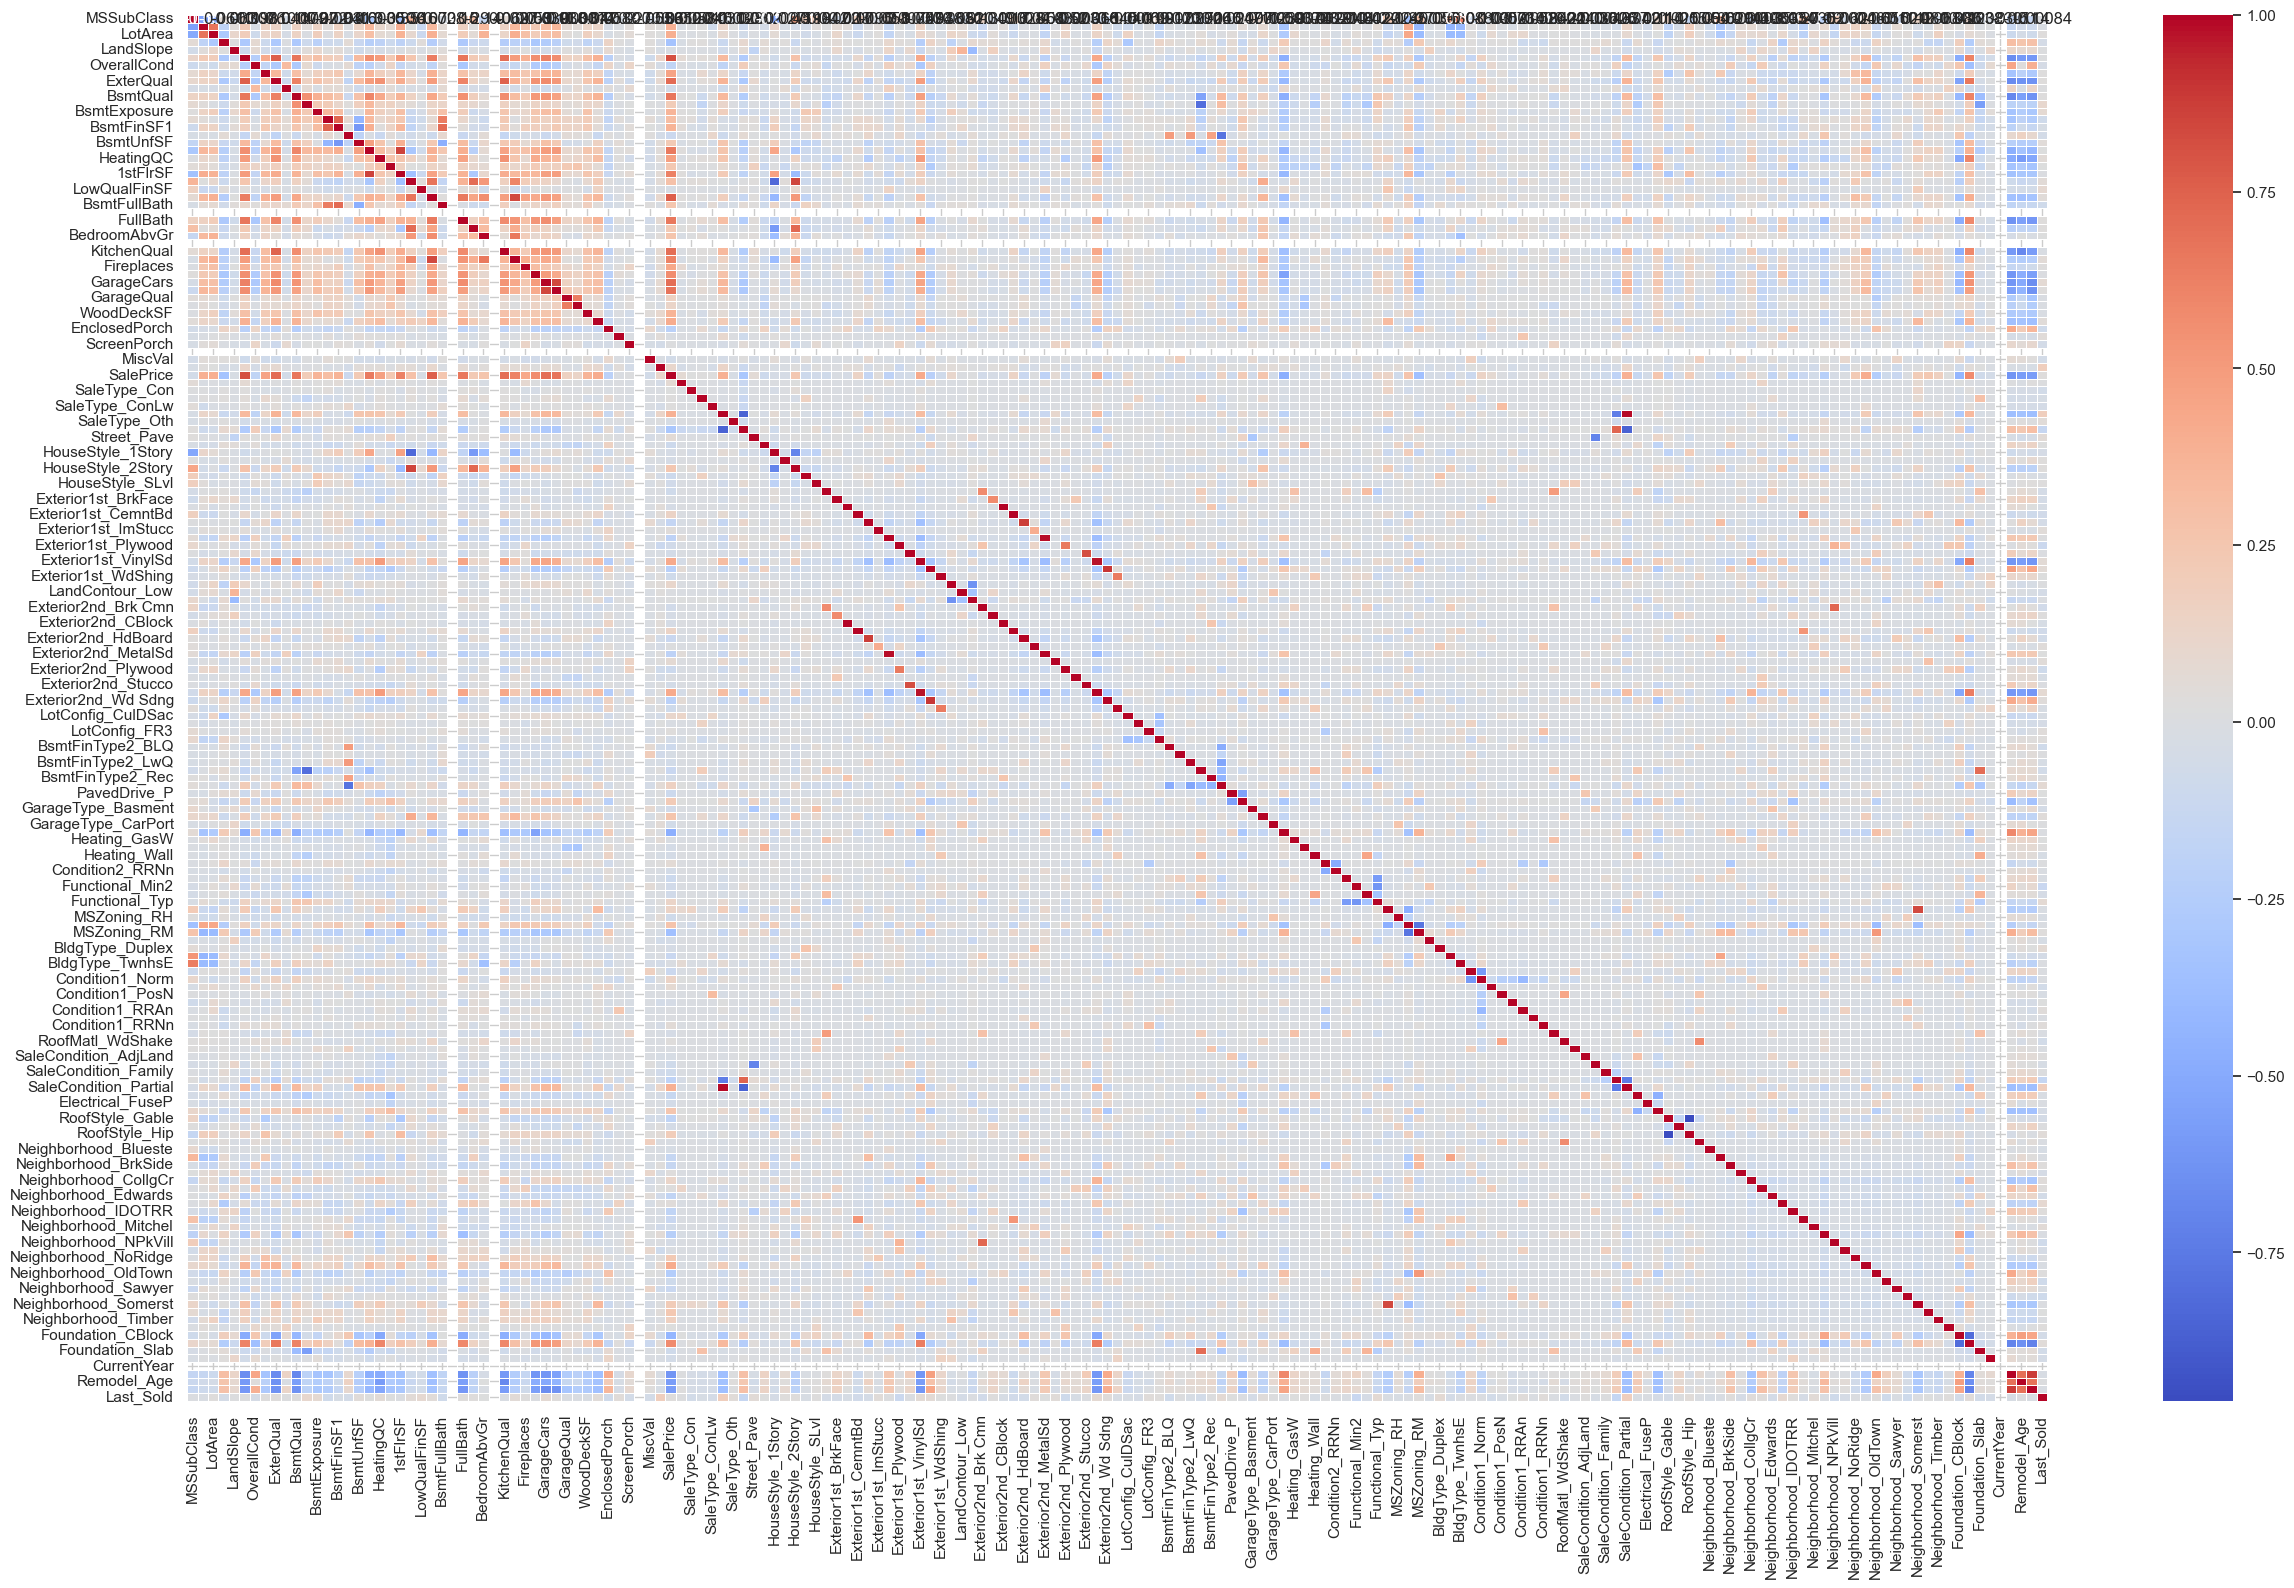

In [115]:
plt.figure(figsize=(30, 18))  # Adjust the size according to your preference
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


In [117]:
# As the heatmap is very condensed let's do some filtering

# Identifying highly correlated varaibles
corr_matrix = data.corr()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Columns with high  +ve Correlation 
cols_pos = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
cols_neg = [col for col in upper_triangle.columns if any(upper_triangle[col] < -0.40)]
print("Features with Positive Co-relation : {}".format(cols_pos))
print("Features with Negative Co-relation : {}".format(cols_neg))

Features with Positive Co-relation : ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice', 'HouseStyle_2Story', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'SaleCondition_Partial', 'Neighborhood_Somerst', 'Garage_Age']
Features with Negative Co-relation : ['LotFrontage', 'LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'SaleType_WD', 'HouseStyle_1Story', 'HouseStyle_2Story', 'LandContour_Lvl', 'BsmtFinType2_No Basement', 'BsmtFinType2_Unf', 'PavedDrive_Y', 'GarageType_Detchd', 'Condition2_RRNn', 'Functional_Typ', 'MSZoning_RL', 'MSZoning_RM', 'BldgType_Twnhs', 'Condition1_Norm', 'Condition1_RRAn', 'SaleCondition_Alloca', 'SaleCondition_Normal', 'SaleCondition_Partial', 'Electrical_SBrkr', 'RoofStyle_Hip', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Age', 'Remodel_Age', 'Garage_Age']


<Axes: >

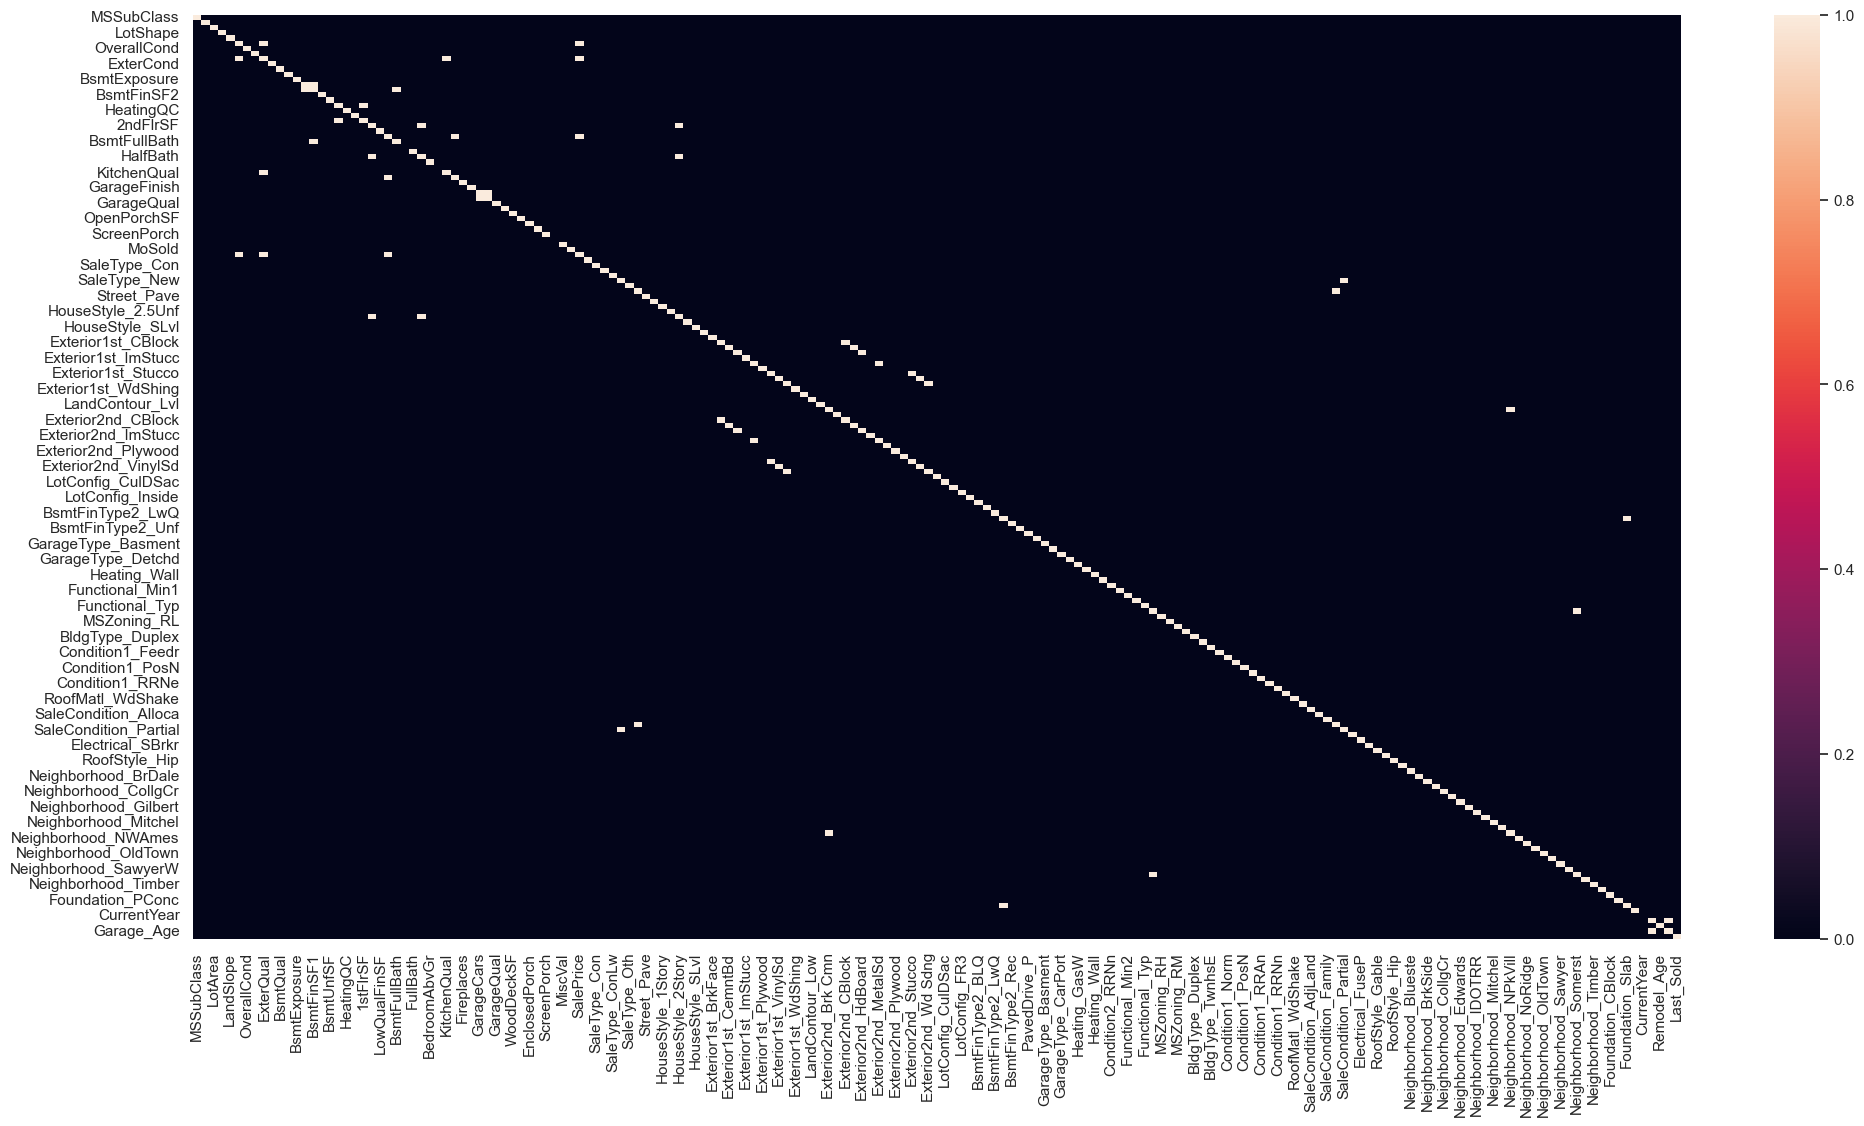

In [118]:
# Zoome View for highlighted features
plt.figure(figsize=(24, 12))
sns.heatmap(corr_matrix > 0.7)

## Step 3 : Variable Manipulation

#### Derived | Dummy | Outliers

In [ ]:
# Some Categorical Values have order in them. We Rank them accordingly

data['LandSlope'] = data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
data['ExterQual'] = data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data.CentralAir.map({'N':0,'Y':1})
data['KitchenQual'] = data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['ExterCond'] = data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['LotShape'] = data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

# Also since many Variable have NA which Panda  would detect as NaN.
# We fill it with 0 as per the mapping
data = data.fillna(0)

In [ ]:
# Removing Orderd Categorical Columns

cat_col = list(set(cat_col)-set(['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
                                'CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']))

# Adding Dummy Columns for Categorical Features
for col in cat_col:
    #Drop-First = True as we want n-1 columns for n categories
    dummies = pd.get_dummies(data[col], drop_first = True)
    
    # To identify the column, adding prefix
    dummies = dummies.add_prefix(f'{col}_')
    
    # Merging the results
    data = pd.concat([data, dummies], axis = 1)
    
    # Drop original column 
    data.drop([col], axis = 1, inplace = True)

print("New Dimesion After changing Categorical Columns : {}".format(data.shape))

New Dimesion After changing Categorical Columns : (796, 178)


In [ ]:
## Changing Date Values to  more derived features

# Adding as reference date
data['CurrentYear'] = datetime.datetime.now().year

# How old is the property
data['Age'] = data['CurrentYear'] - data["YearBuilt"]
# years since it was remodelled
data['Remodel_Age'] = data['CurrentYear'] - data["YearRemodAdd"]
# How old is the Garage
data['Garage_Age'] = data['CurrentYear'] - data["GarageYrBlt"]
# Years since it was last sold
data['Last_Sold'] = data['CurrentYear'] - data["YrSold"]

# Dropping Actual Columns
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')


print("Data Size : {}".format(data.shape))
data[["Age","Remodel_Age","Garage_Age","Last_Sold"]].head()

Data Size : (796, 179)


,Age,Remodel_Age,Garage_Age,Last_Sold
0,21,21,21.0,16
2,23,22,23.0,16
4,24,24,24.0,16
6,20,19,20.0,17
10,59,59,59.0,16


In [ ]:
# Updating the Numerical Columns List 
num_col = list(set(num_col) - set(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']))

In [ ]:
# Split the dataset

X_train,X_test = train_test_split(data,train_size=0.8,test_size=0.2,random_state=42)

print("Training Size : {}".format(X_train.shape[0]))
print("Test Size : {}".format(X_test.shape[0]))

Training Size : 636
Test Size : 160


In [ ]:
# Separating the Target Variable
y_train =  X_train.pop("SalePrice")
y_test =  X_test.pop("SalePrice")

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

print("Training Data Size : {}".format(X_train.shape))
print("Test Data Size : {}".format(X_test.shape))

Training Data Size : (636, 178)
Test Data Size : (160, 178)


In [ ]:
## Step 5. Model Evaluation

#### Feature Selection | Lasso Regression | Ridge Regression

In [ ]:
# Using RFE with a Linear Regression Model to subselect feature

lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify the number of features to select (e.g., 50)
num_features_to_select = 50

rfe = RFE(lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)

selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
print("Columns Selected by RFE : {}".format(X_train.columns[rfe.support_]))
print()
print("Columns Rejected by RFE : {}".format(X_train.columns[~rfe.support_]))

Columns Selected by RFE : Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'KitchenAbvGr', 'GarageArea', 'PoolArea', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'BsmtFinType2_No Basement', 'GarageType_CarPort',
       'Condition2_Norm', 'Condition2_RRNn', 'Functional_Mod',
       'Condition1_PosA', 'Condition1_RRNn', 'RoofMatl_Tar&Grv',
       'SaleCondi

In [ ]:
# Filtering Features based on RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]

print("Train Data : {}".format(X_train.shape))
print("Test Data : {}".format(X_test.shape))
print("**********************")
print("Train Data : {}".format(X_train_rfe.shape))
print("Test Data : {}".format(X_test_rfe.shape))

Train Data : (636, 178)
Test Data : (160, 178)
**********************
Train Data : (636, 50)
Test Data : (160, 50)


In [ ]:
# Common Predict Function for any model
def predict(model,train=X_train,test=X_test) :
    
    # predict train
    y_train_pred = model.predict(train)
    # predict test
    y_test_pred = model.predict(test)
    
    return y_train_pred,y_test_pred

# Common Function to print R-squared value for Train & Test Set 
def r2(y_train_pred,y_test_pred,model_name="Linear Regression") :
    print("R2 on {} Training  : {}".format(model_name,r2_score(y_train,y_train_pred)))
    print("R2 on {} Test  : {}".format(model_name,r2_score(y_test, y_test_pred)))
    

# Common Function to Plot results for Alpha
def plot_cv_results(model_cv,threshold=200) :
    
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=threshold]
    
    # plotting mean test and train scores with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

    # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred,y_test_pred = predict(lm)
r2(y_train_pred,y_test_pred,model_name="Linear Regression")

R2 on Linear Regression Training  : 0.9439713236289907
R2 on Linear Regression Test  : 0.8853443109683157


In [ ]:
# list of alphas to tune during K-Fold Grid Search

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Alpha : {'alpha': 2.0}


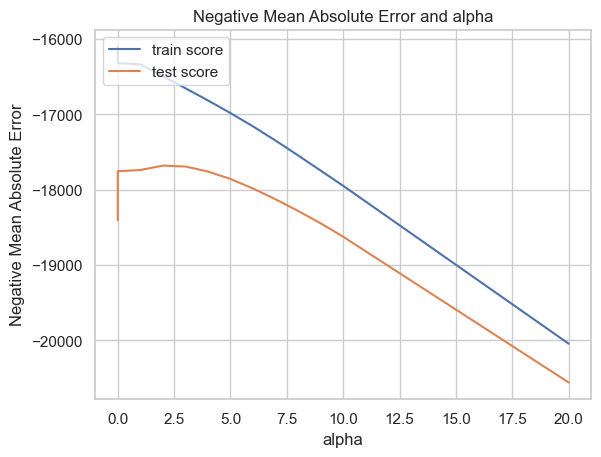

In [ ]:
# Ridge Regression With RFE 
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            
model_cv.fit(X_train_rfe, y_train) 

print("Best Alpha : {}".format(model_cv.best_params_))
# PLot the results on Alpha. Set Threshold to visualise to scale
plot_cv_results(model_cv,threshold=20)

In [ ]:
# The best test performance is at alpha = 
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha)
ridge.fit(X_train_rfe, y_train)

y_train_pred_m2,y_test_pred_m2 = predict(ridge,train=X_train_rfe,test=X_test_rfe)
r2(y_train_pred_m2,y_test_pred_m2,model_name="Ridge Regression")

R2 on Ridge Regression Training  : 0.8905135870401449
R2 on Ridge Regression Test  : 0.8274620935625299


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Alpha : {'alpha': 3.0}


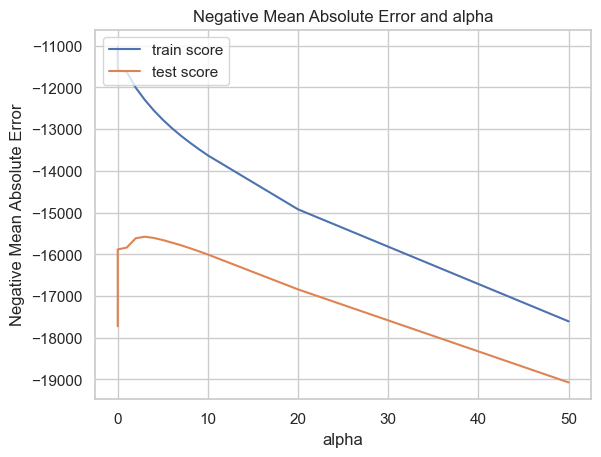

In [ ]:
# Ridge Linear Regression On All Features
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            
model_cv.fit(X_train, y_train) 

print("Best Alpha : {}".format(model_cv.best_params_))
# PLot the results on Alpha. Set Threshold to visualise to scale
plot_cv_results(model_cv,threshold=50)

In [ ]:
# The best test performance is at alpha = 
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=3) #3
ridge.fit(X_train, y_train)

y_train_pred_m3,y_test_pred_m3 = predict(ridge,train=X_train,test=X_test)
r2(y_train_pred_m3,y_test_pred_m3,model_name="Ridge Regression")

R2 on Ridge Regression Training  : 0.9337166517440458
R2 on Ridge Regression Test  : 0.9027945094138702


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Alpha : {'alpha': 100}


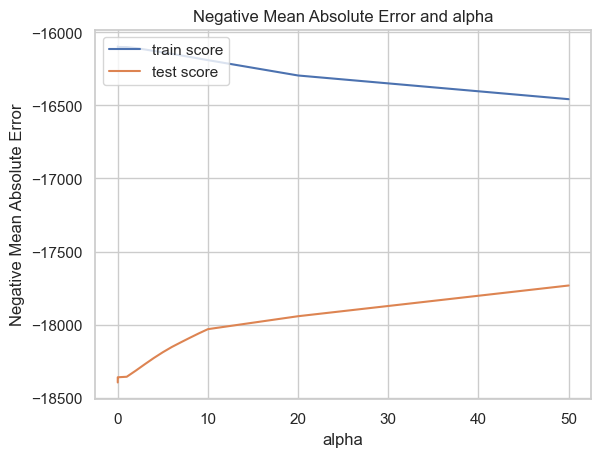

In [ ]:
# Lasso Regression with RFE

lasso = Lasso()

# cross validation
folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            

model_cv.fit(X_train_rfe, y_train) 

print("Best Alpha : {}".format(model_cv.best_params_))
# PLot the results on Alpha. Set Threshold to visualise to scale
plot_cv_results(model_cv,threshold=50)

In [ ]:
# The best test performance is at alpha = 

alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)

y_train_pred_m4,y_test_pred_m4 = predict(lasso,train=X_train_rfe,test=X_test_rfe)
r2(y_train_pred_m4,y_test_pred_m4,model_name="Lasso Regression")

R2 on Lasso Regression Training  : 0.888806868516312
R2 on Lasso Regression Test  : 0.8294046731950531


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Alpha : {'alpha': 100}


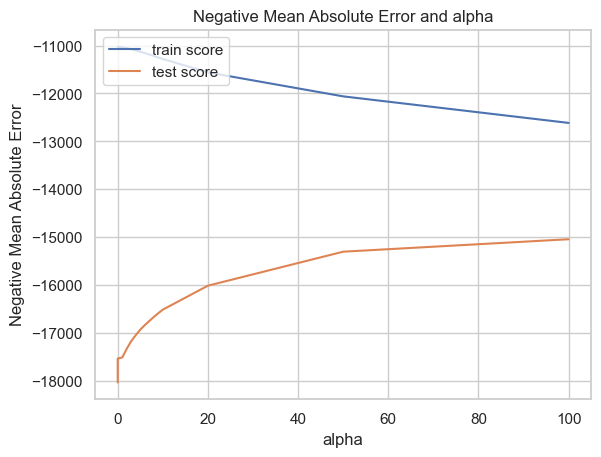

In [ ]:
# Lasso Regression With All Features

lasso = Lasso()

# cross validation
folds = 5

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            

model_cv.fit(X_train, y_train) 

print("Best Alpha : {}".format(model_cv.best_params_))
# PLot the results on Alpha. Set Threshold to visualise to scale
plot_cv_results(model_cv,threshold=200)

In [ ]:
# The best test performance is at alpha = 

alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_train_pred_m5,y_test_pred_m5 = predict(lasso,train=X_train,test=X_test)
r2(y_train_pred_m5,y_test_pred_m5,model_name="Lasso Regression")

R2 on Lasso Regression Training  : 0.9312098332114882
R2 on Lasso Regression Test  : 0.8987460563541055


## Observation
1. We tried Ridge & Lasso regression with all the features we create & 50 top features selected by RFE
2. For **Ridge Regression** we observe :  
    i. **All Features** Model (alpha = 3.0 ): R2 is 0.935 with ~180 features  
    ii. **RFE Features** Model (alpha = 2 ) : R2 is 0.890 with 50 features  
3. For **Lasso Regression** we observe :  
    i. **All Features** Model (alpha = 100 ) : R2 is 0.931 with ~180 features  
    ii. **RFE Features** Model (alpha = 100 ) : R2 is 0.888 with 50 features  
4. It should be observed that model with lesser features with almost similar performace is better. Hence we will prefer models using only 50 features.
5. Also, since we explicitly handled outliers in our dataset, Ridge & Lasso have very similar performance.
6. It should be noted, that outliers affect Ridge Regression more than Lasso

In [ ]:
# Calculate the VIFs for  model
def get_vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

def plot_pred(test,pred,idx,title="") :
#     fig = plt.figure()
    ax = plt.subplot(2,2,idx)
    plt.scatter(test, pred)
    ax.set_title(title)
    plt.xlabel('y_test', fontsize = 10) # Y-label                     
    plt.ylabel('y_pred', fontsize = 10) # X-label
    
def plot_error(train,pred,idx,title="") :
    # Plot the histogram of the error terms
    plt.subplot(2,2,idx)
    ax = sns.distplot((train - pred), bins = 15)
    ax.set_title(title)
    plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 12)   

def plot_prediction(index,label,pred,idx,title="") :
    # Plot the histogram of the error terms
    ax = plt.subplot(4,1,idx)
    plt.plot(index,label,color="blue")
    plt.plot(index,pred,color="red")
    ax.set_title(title)
    plt.suptitle('Actual v/s Predicted', fontsize = 20)                  # Plot heading 
#     plt.xlabel('Errors', fontsize = 18) 

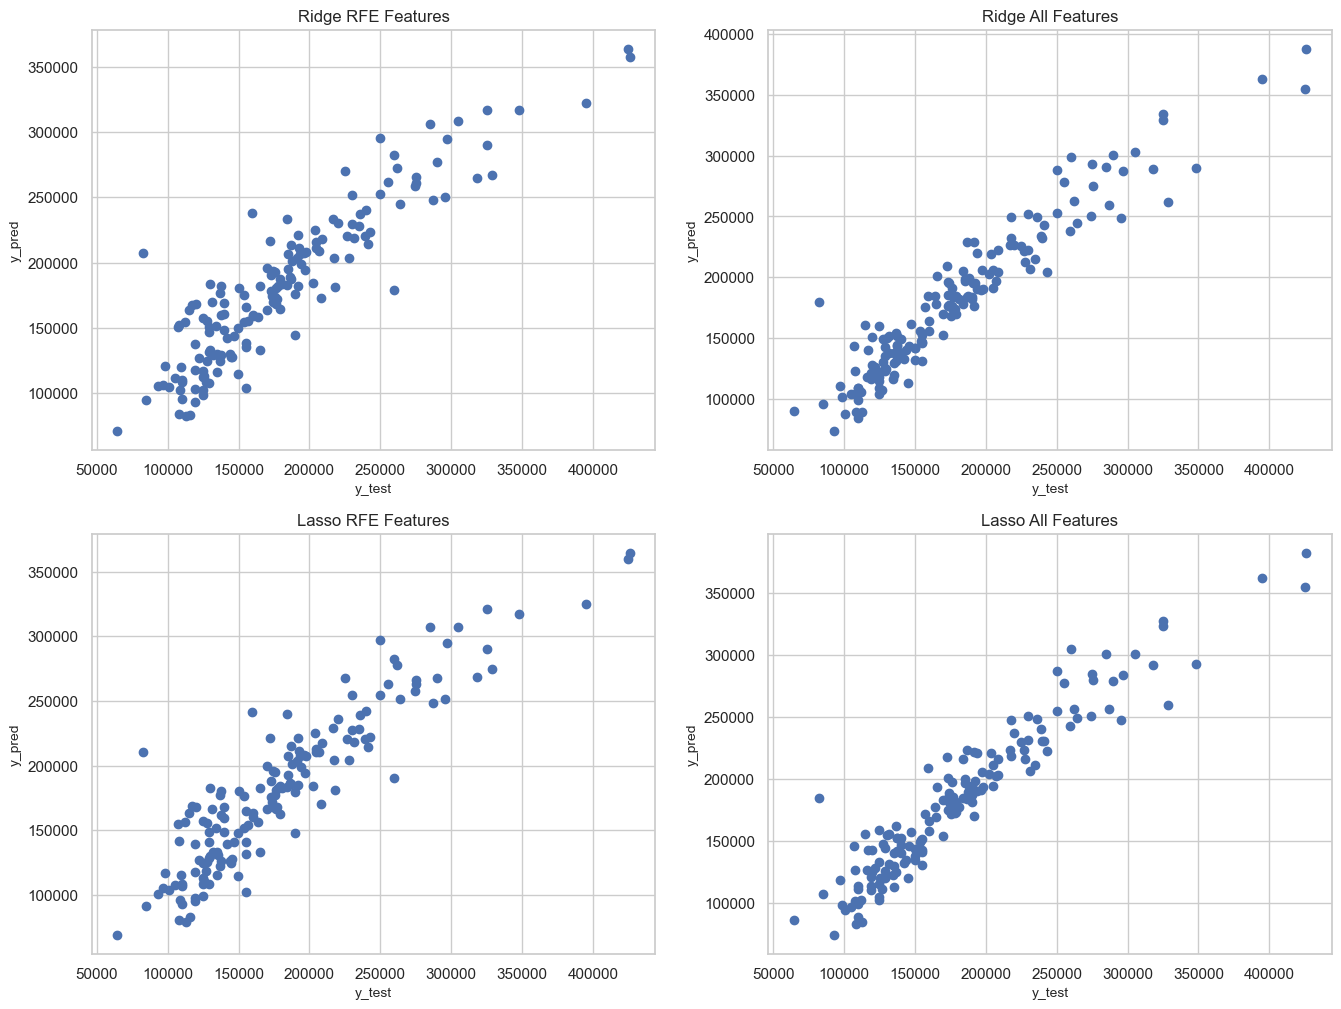

In [ ]:
### Plot the prediction

# Plot Y-Test v/s Y-Pred , showing linear relationship. Hence we can say to have a good model

plt.figure(figsize=(16, 12))
plot_pred(y_test,y_test_pred_m2,1,title="Ridge RFE Features")
plot_pred(y_test,y_test_pred_m3,2,title="Ridge All Features")
plot_pred(y_test,y_test_pred_m4,3,title="Lasso RFE Features")
plot_pred(y_test,y_test_pred_m5,4,title="Lasso All Features")

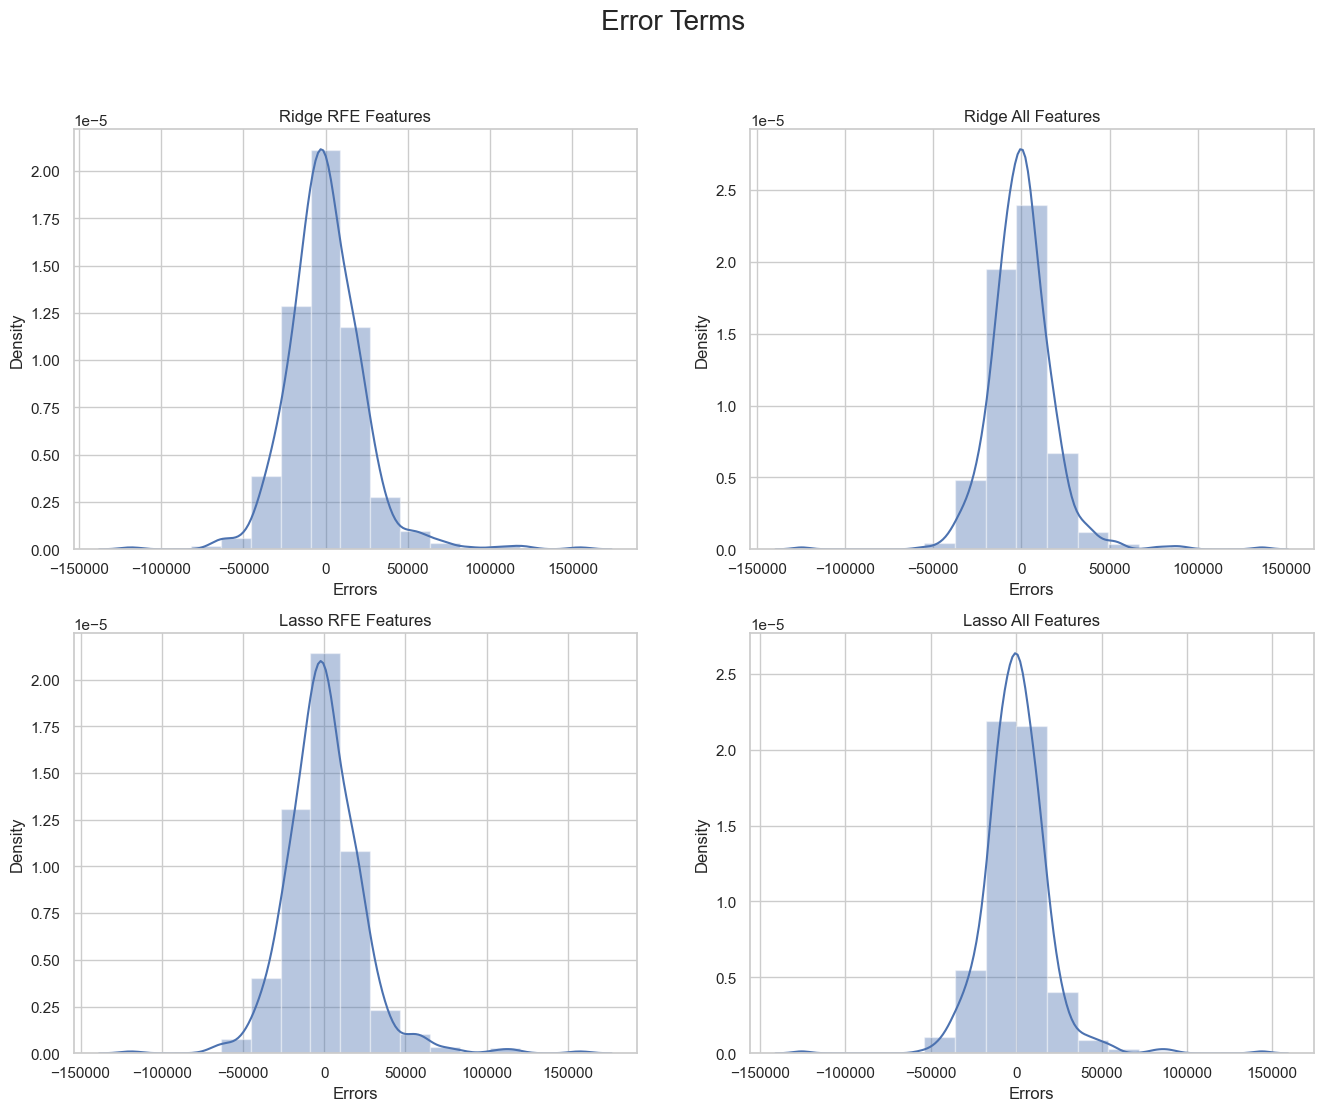

In [ ]:
# Error Term Distribution for Training Dataset validating Linear Regression Assumptions

plt.figure(figsize=(16, 12))
plot_error(y_train,y_train_pred_m2,1,title="Ridge RFE Features")
plot_error(y_train,y_train_pred_m3,2,title="Ridge All Features")
plot_error(y_train,y_train_pred_m4,3,title="Lasso RFE Features")
plot_error(y_train,y_train_pred_m5,4,title="Lasso All Features")

In [ ]:
# best model 
lasso = Lasso(alpha=100)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=100)

In [ ]:
model_coef = list(lasso.coef_)
model_coef.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_coef)))
lasso_coef.columns = ['Feature','Coef']

top_5_pos = lasso_coef.sort_values(by="Coef",ascending=False)["Feature"].head(5).tolist()
top_5_neg = lasso_coef.sort_values(by="Coef",ascending=True)["Feature"].head(5).tolist()

print("The Variables that positively/directly affect the price of a house are : {}".format(top_5_pos))
print()
print("The Variables that negatively/indirectly affect the price of a house are : {}".format(top_5_neg))

The Variables that positively/directly affect the price of a house are : ['BsmtFinSF1', 'KitchenAbvGr', 'OverallQual', '1stFlrSF', 'PoolArea']

The Variables that negatively/indirectly affect the price of a house are : ['LotArea', 'Condition1_PosA', 'RoofStyle_Hip', 'Exterior1st_WdShing', 'Exterior2nd_ImStucc']
